In [1]:
#Import Requirment Library
import pandas as pd
from datetime import date
from datetime import datetime
import matplotlib.pylab as plt

In [2]:
# Read CSV file into a DataFrame I selected this because it is hardest of them. :)
df = pd.read_csv("Day4_Trades_SPY.csv")
df

,Time,PRICE,SIZE,EXCHANGE,PARTICIPANT_TIME
0,09:30:00.002130,236.28,100,Z,09:30:00.000093
1,09:30:00.002130,236.29,100,K,09:30:00.000101
2,09:30:00.002130,236.11,1,K,09:30:00.001527
3,09:30:00.002141,236.17,20,K,09:30:00.001640
4,09:30:00.002180,236.03,10,K,09:30:00.001714
...,...,...,...,...,...
2803897,16:00:00.275485,241.43,600,T,16:00:00.274876
2803898,16:00:00.275499,241.17,610,T,16:00:00.274878
2803899,16:00:00.275518,241.25,1090,T,16:00:00.274878
2803900,16:00:00.275534,241.27,10,T,16:00:00.274882


In [3]:
# General checking: Describes numerical features
df.describe()

,PRICE,SIZE
count,2.803902e+06,2.803902e+06
mean,2.368660e+02,9.693719e+01
std,4.192842e+00,1.385586e+03
min,2.278100e+02,1.000000e+00
25%,2.332400e+02,1.400000e+01
50%,2.374100e+02,8.500000e+01
75%,2.400500e+02,1.000000e+02
max,2.484900e+02,2.094942e+06


In [4]:
# Data Type Checking: Convert 'Time' column to datetime format
df.dtypes

Time                 object
PRICE               float64
SIZE                  int64
EXCHANGE             object
PARTICIPANT_TIME     object
dtype: object

In [5]:
# Eliminate nanoseconds and convert 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time']).dt.floor('ns')

In [6]:
# Verify the column types after conversion
df.dtypes

Time                datetime64[ns]
PRICE                      float64
SIZE                         int64
EXCHANGE                    object
PARTICIPANT_TIME            object
dtype: object

In [7]:
# Convert 'PARTICIPANT_TIME' column to datetime format
df['PARTICIPANT_TIME'] = pd.to_datetime(df['PARTICIPANT_TIME']).dt.floor('ns')

In [8]:
# Verify the column types after conversion
df.dtypes

Time                datetime64[ns]
PRICE                      float64
SIZE                         int64
EXCHANGE                    object
PARTICIPANT_TIME    datetime64[ns]
dtype: object

In [9]:
df.head()

,Time,PRICE,SIZE,EXCHANGE,PARTICIPANT_TIME
0,2023-11-12 09:30:00.002130,236.28,100,Z,2023-11-12 09:30:00.000093
1,2023-11-12 09:30:00.002130,236.29,100,K,2023-11-12 09:30:00.000101
2,2023-11-12 09:30:00.002130,236.11,1,K,2023-11-12 09:30:00.001527
3,2023-11-12 09:30:00.002141,236.17,20,K,2023-11-12 09:30:00.001640
4,2023-11-12 09:30:00.002180,236.03,10,K,2023-11-12 09:30:00.001714


In [10]:
# Reset the DataFrame index
df = df.reset_index()
df

,index,Time,PRICE,SIZE,EXCHANGE,PARTICIPANT_TIME
0,0,2023-11-12 09:30:00.002130,236.28,100,Z,2023-11-12 09:30:00.000093
1,1,2023-11-12 09:30:00.002130,236.29,100,K,2023-11-12 09:30:00.000101
2,2,2023-11-12 09:30:00.002130,236.11,1,K,2023-11-12 09:30:00.001527
3,3,2023-11-12 09:30:00.002141,236.17,20,K,2023-11-12 09:30:00.001640
4,4,2023-11-12 09:30:00.002180,236.03,10,K,2023-11-12 09:30:00.001714
...,...,...,...,...,...,...
2803897,2803897,2023-11-12 16:00:00.275485,241.43,600,T,2023-11-12 16:00:00.274876
2803898,2803898,2023-11-12 16:00:00.275499,241.17,610,T,2023-11-12 16:00:00.274878
2803899,2803899,2023-11-12 16:00:00.275518,241.25,1090,T,2023-11-12 16:00:00.274878
2803900,2803900,2023-11-12 16:00:00.275534,241.27,10,T,2023-11-12 16:00:00.274882


# 1

# What happened to price over the course of the day?

In [11]:
# Group by 'EXCHANGE' and describe the 'PRICE' column
df.groupby('EXCHANGE')['PRICE'].describe()

,count,mean,std,min,25%,50%,75%,max
EXCHANGE,,,,,,,,
A,7201.0,237.164176,3.408570,228.36,234.0100,237.810,239.7600,246.93
B,111407.0,236.963973,4.129596,227.83,233.3200,237.580,240.1300,246.27
C,3836.0,236.226650,3.772347,228.14,233.0700,236.460,239.4400,245.42
D,256984.0,236.571604,4.253923,227.85,232.9800,236.740,239.8300,246.22
J,80937.0,236.773819,4.246591,227.86,233.1600,237.350,240.0500,246.16
K,361928.0,236.201433,4.068856,227.88,232.8500,236.070,239.4300,246.20
M,60.0,234.681167,4.485172,228.77,231.3025,232.875,238.2575,243.68
N,90787.0,237.292900,4.042653,227.98,233.7100,238.080,240.1500,248.49
P,523957.0,237.103983,4.235503,227.81,233.4100,237.900,240.2100,246.25


# How much did it change overall, and in what direction? 

In [12]:
# Calculate the difference between the first and last prices for each exchange
df_diff_Price=pd.merge(df.groupby('EXCHANGE')['PRICE'].first(), df.groupby('EXCHANGE')['PRICE'].last(), on='EXCHANGE')
df_diff_Price["difference"]=df_diff_Price["PRICE_y"]-df_diff_Price["PRICE_x"]
df_diff_Price["isUp"]= df_diff_Price["difference"] > 0
df_diff_Price

,PRICE_x,PRICE_y,difference,isUp
EXCHANGE,,,,
A,236.35,241.45,5.10,True
B,236.23,241.12,4.89,True
C,236.44,241.25,4.81,True
D,236.11,241.07,4.96,True
J,236.11,240.71,4.60,True
K,236.29,240.96,4.67,True
M,242.75,236.96,-5.79,False
N,236.41,241.04,4.63,True
P,236.41,239.79,3.38,True


In [13]:
# All Currencies increased except that "M"
#if difference is Negative, it means it decrased. if not, it means it increased

# When was it changing fastest?

In [14]:
times = pd.to_datetime(df.Time)
df['Hour']=times.dt.hour
df['Minute']=times.dt.minute

In [15]:
# Create a DataFrame to store open, low, high, close, volume, and count for each exchange and hour
OpenCloseTablePerHour = {}
Index=df.Hour.unique()
OpenCloseTablePerHour["Currency"] = []
IndexForPandas=[]
OpenCloseTablePerHour["Open"] = []
OpenCloseTablePerHour["Low"] = []
OpenCloseTablePerHour["High"] = []
OpenCloseTablePerHour["Close"] = []
OpenCloseTablePerHour["Volume"] = []
OpenCloseTablePerHour["Count"] = []

# Populate the DataFrame with values for each exchange and hour
for i in df.EXCHANGE.unique():
    for j in Index:
        Open = 0
        Low = 0
        High = 0
        Close = 0
        Volume = 0
        Count = 0

        try:
            Open = df[(df['EXCHANGE'] == i) & (df['Hour'] == j)]['PRICE'].iloc[0]
        except IndexError:
            Open = 0

        OpenCloseTablePerHour["Open"].append(Open)

        try:
            Low = df[(df['EXCHANGE'] == i) & (df['Hour'] == j)]['PRICE'].min()
        except ValueError:
             Low = 0

        OpenCloseTablePerHour["Low"].append(Low)

        try:
            High = df[(df['EXCHANGE'] == i) & (df['Hour'] == j)]['PRICE'].max()
        except ValueError:
            High = 0

        OpenCloseTablePerHour["High"].append(High)

        try:
            Close = df[(df['EXCHANGE'] == i) & (df['Hour'] == j)]['PRICE'].iloc[-1]
        except IndexError:
            Close = 0

        OpenCloseTablePerHour["Close"].append(Close)

        try:
            Volume = df[(df['EXCHANGE'] == i) & (df['Hour'] == j)]['SIZE'].sum()
        except ValueError:
            Volume = 0
        
        OpenCloseTablePerHour["Volume"].append(Volume)
        
        try:
            Count = df[(df['EXCHANGE'] == i) & (df['Hour'] == j)]['PRICE'].count()
        except ValueError:
            Count = 0

        OpenCloseTablePerHour["Count"].append(Count)
        
        OpenCloseTablePerHour["Currency"].append(i)
        IndexForPandas.append(j)
     

In [16]:
OpenCloseTablePerHour = pd.DataFrame(OpenCloseTablePerHour,index=IndexForPandas)
OpenCloseTablePerHour

,Currency,Open,Low,High,Close,Volume,Count
9,Z,236.28,236.01,244.60,242.57,3427493,41456
10,Z,242.63,239.94,246.24,240.11,4057307,51175
11,Z,240.15,236.88,241.68,241.16,4512539,58654
12,Z,241.01,235.47,241.47,235.65,3323449,38381
13,Z,235.15,229.81,237.01,231.90,4112661,43019
...,...,...,...,...,...,...,...
12,M,240.01,235.84,240.17,235.84,106,7
13,M,233.32,230.11,233.32,232.19,501,8
14,M,231.52,228.77,232.32,232.01,1011,25
15,M,235.04,233.47,240.17,236.96,9,6


In [17]:
OpenCloseTablePerHour=OpenCloseTablePerHour.dropna(axis=0)
OpenCloseTablePerHour

,Currency,Open,Low,High,Close,Volume,Count
9,Z,236.28,236.01,244.60,242.57,3427493,41456
10,Z,242.63,239.94,246.24,240.11,4057307,51175
11,Z,240.15,236.88,241.68,241.16,4512539,58654
12,Z,241.01,235.47,241.47,235.65,3323449,38381
13,Z,235.15,229.81,237.01,231.90,4112661,43019
...,...,...,...,...,...,...,...
11,M,240.10,237.62,240.10,237.99,205,8
12,M,240.01,235.84,240.17,235.84,106,7
13,M,233.32,230.11,233.32,232.19,501,8
14,M,231.52,228.77,232.32,232.01,1011,25


In [18]:
for i in OpenCloseTablePerHour['Currency'].unique():
    OpenCloseTablePerHour[(OpenCloseTablePerHour['Currency'] == i)]

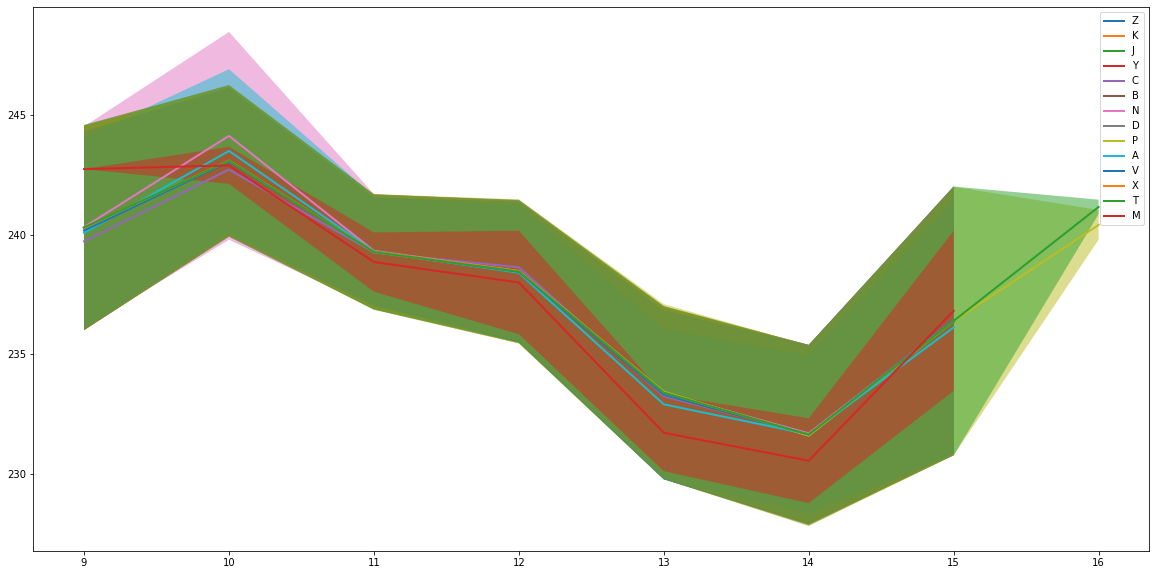

In [19]:
# plot
fig, ax = plt.subplots(figsize=(20, 10))
for currency in OpenCloseTablePerHour['Currency'].unique():
    plotedFrame = OpenCloseTablePerHour[(OpenCloseTablePerHour['Currency'] == currency)]
    x=plotedFrame.index
    yDown=plotedFrame['Low']
    yUp=plotedFrame['High']
    ax.fill_between(x, yDown, yUp, alpha=.5, linewidth=0)
    ax.plot(x, (yDown + yUp)/2, linewidth=2, label=currency)
plt.legend()
plt.show()

In [20]:
OpenCloseTablePerHour["Difference"]=abs(OpenCloseTablePerHour['Low']-OpenCloseTablePerHour['High'])

C:\Users\hskay\AppData\Local\Temp\ipykernel_16772\3020060673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OpenCloseTablePerHour["Difference"]=abs(OpenCloseTablePerHour['Low']-OpenCloseTablePerHour['High'])


In [21]:
OpenCloseTablePerHour.groupby(["Currency"])['Difference'].idxmax()

Currency
A    15
B    15
C    15
D    15
J    15
K    15
M    15
N    15
P    15
T    15
V    15
X    15
Y    15
Z    15
Name: Difference, dtype: int64

In [22]:
OpenCloseTablePerHour.groupby(["Currency"])['Difference'].last()

Currency
A    10.65
B    11.13
C    10.75
D    11.24
J    11.09
K    11.16
M     6.70
N    11.23
P     1.25
T     0.61
V    11.19
X    11.23
Y    11.25
Z    11.18
Name: Difference, dtype: float64

In [23]:
# So 15:00 - 15:59:59 is so hight changing.

<AxesSubplot:xlabel='Hour'>

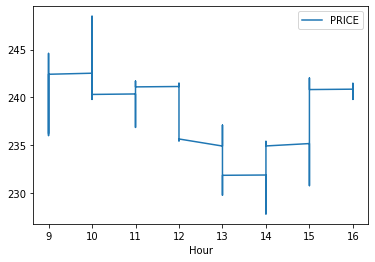

In [24]:
df.plot(x='Hour',y='PRICE')

# When was holding mostly steady (if at all)?

In [25]:
OpenCloseTablePerHour.groupby(["Currency"])['Difference'].idxmin()

Currency
A    11
B    11
C    11
D    11
J    11
K    11
M     9
N    11
P    16
T    16
V    11
X    11
Y    11
Z    11
Name: Difference, dtype: int64

In [26]:
# Mostly 11:00-11:59:59

In [27]:
OpenCloseTablePerHour.groupby(["Currency"])['Volume'].idxmin()

Currency
A    14
B    10
C     9
D     9
J    10
K    10
M    15
N    10
P    16
T    16
V     9
X    12
Y    10
Z    12
Name: Volume, dtype: int64

# 2

# What happened to sizes of individual trades over the course of the day?

In [28]:
OpenCloseTablePerHour[["Currency",'Volume']]

,Currency,Volume
9,Z,3427493
10,Z,4057307
11,Z,4512539
12,Z,3323449
13,Z,4112661
...,...,...
11,M,205
12,M,106
13,M,501
14,M,1011


In [29]:
OpenCloseTablePerHour.groupby("Currency")['Volume'].describe()

,count,mean,std,min,25%,50%,75%,max
Currency,,,,,,,,
A,7.0,1.016254e+05,8.334768e+04,35615.0,52055.00,91260.0,99535.00,281323.0
B,7.0,8.185643e+05,3.163814e+05,567687.0,653947.00,759381.0,794227.00,1506534.0
C,7.0,1.036089e+05,1.058011e+05,22233.0,38427.50,55670.0,123405.00,323694.0
D,7.0,6.713489e+06,1.796111e+06,4909488.0,5544991.50,6284052.0,7238620.50,10233660.0
J,7.0,8.764229e+05,3.147767e+05,582304.0,711521.50,743132.0,929269.50,1527942.0
K,7.0,4.335754e+06,2.207427e+06,2153742.0,2926305.50,3520939.0,5167131.50,8488722.0
M,7.0,4.615714e+02,5.053922e+02,9.0,103.00,205.0,756.00,1299.0
N,7.0,7.453963e+05,4.662626e+05,421173.0,524488.00,647477.0,661206.50,1777735.0
P,8.0,7.336165e+06,3.527428e+06,2095992.0,6223925.25,7443240.0,7682248.75,14652413.0


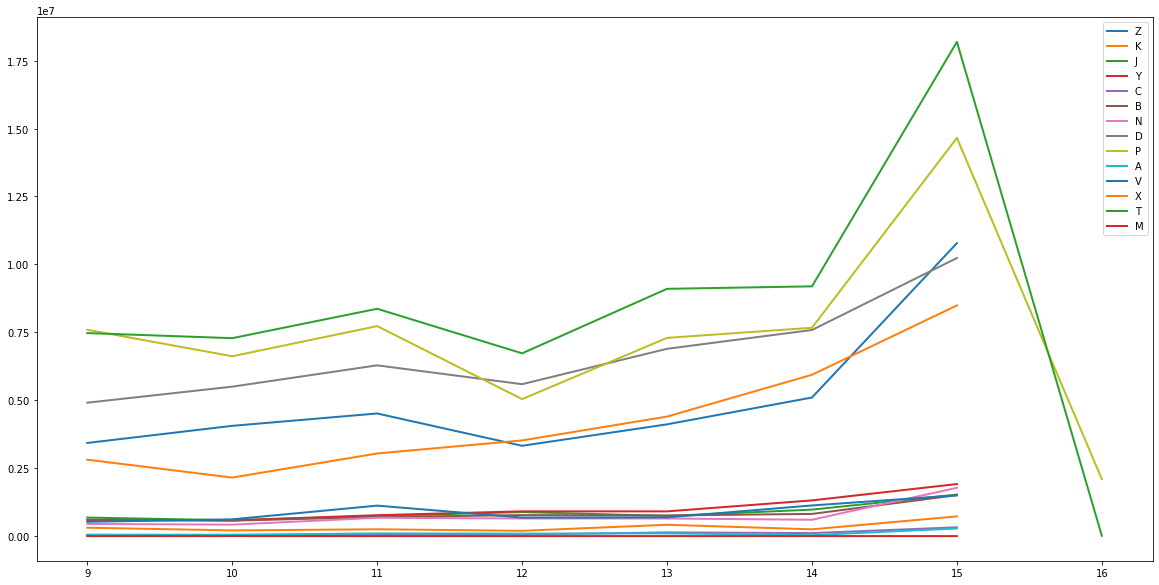

In [30]:
# plot
fig, ax = plt.subplots(figsize=(20, 10))
for currency in OpenCloseTablePerHour['Currency'].unique():
    plotedFrame = OpenCloseTablePerHour[(OpenCloseTablePerHour['Currency'] == currency)]
    x=plotedFrame.index
    y=plotedFrame["Volume"]
    ax.plot(x, y, linewidth=2, label=currency)
plt.legend()
plt.show()

In [31]:
# "T" is so high and of course it has really big correlasion with price diff.

In [32]:
corr = OpenCloseTablePerHour.corr()
corr.style.background_gradient(cmap='coolwarm')

,Open,Low,High,Close,Volume,Count,Difference
Open,1.000000,0.914825,0.725004,0.384303,-0.156494,-0.119427,-0.511757
Low,0.914825,1.000000,0.831050,0.619369,-0.190784,-0.156138,-0.499364
High,0.725004,0.831050,1.000000,0.793270,-0.005299,0.021091,0.066889
Close,0.384303,0.619369,0.793270,1.000000,0.035852,0.047327,0.124597
Volume,-0.156494,-0.190784,-0.005299,0.035852,1.000000,0.943326,0.333992
Count,-0.119427,-0.156138,0.021091,0.047327,0.943326,1.000000,0.312948
Difference,-0.511757,-0.499364,0.066889,0.124597,0.333992,0.312948,1.000000


In [33]:
# probaly I am wrong

# Does trade size seem correlated with time of day at all in your opinion?


In [34]:
# saying something is hard because definetly there is realition on 15:00 this hour has maximum difference and maximum volume :)

In [35]:
OpenCloseTablePerHour.groupby("Currency")['Volume'].idxmax()

Currency
A    15
B    15
C    15
D    15
J    15
K    15
M    10
N    15
P    15
T    15
V    15
X    15
Y    15
Z    15
Name: Volume, dtype: int64

In [36]:
# saying something is hard because definetly there is realition on 15:00 this hour has maximum difference and maximum volume :)

# 3

# What happened to the rate of trading throughout the day?

In [37]:
OpenCloseTablePerHour.groupby(["Currency"])["Count"].idxmax()

Currency
A    15
B    15
C    15
D    15
J    15
K    15
M    14
N    15
P    15
T    15
V    15
X    15
Y    15
Z    15
Name: Count, dtype: int64

In [38]:
# of course if its volume is high, its count would be high too 

# What was the greatest number of trades per minute?

In [39]:
#df.groupby([pd.Grouper(key = 'Time', freq='1min'), 'EXCHANGE']).count()
(df.groupby([pd.Grouper(key = 'Time', freq='1min')]).count()['index'].idxmax(),df.groupby([pd.Grouper(key = 'Time', freq='1min')]).count()['index'].max())

(Timestamp('2023-11-12 15:54:00', freq='T'), 26518)

In [40]:
#Here We Go below time has maximum Number Of Trade :) 26,518 :)))

# Per second?

In [41]:
(df.groupby([pd.Grouper(key = 'Time', freq='1s')]).count()['index'].idxmax(),df.groupby([pd.Grouper(key = 'Time', freq='1s')]).count()['index'].max())

(Timestamp('2023-11-12 14:15:56', freq='S'), 2479)

# How did the density of trading activity vary throughout the day?

In [42]:
DensityMap=df.groupby(["Hour","Minute"]).count()['index']
DensityMap

Hour  Minute
9     30        12993
      31        12169
      32        11760
      33        11952
      34        11460
                ...  
15    56        26422
      57        22225
      58        19772
      59        20865
16    0            41
Name: index, Length: 377, dtype: int64

In [43]:
IndexCol=[]
IndexRow=[]
for i in DensityMap.index:
    IndexCol.append(i[0])
    IndexRow.append(i[1])
IndexCol=set(IndexCol)
IndexRow=set(IndexRow)
HeatMap=[[0 for i in range(len(IndexRow))] for i in range(len(IndexCol))]
for index,i in enumerate(DensityMap.index):
    HeatMap[i[0]-min(IndexCol)][i[1]-min(IndexRow)]=DensityMap.iloc[index]

In [44]:
HeatMap = pd.DataFrame(HeatMap)

In [45]:
HeatMap.index=[i+9 for i in HeatMap.index]

In [46]:
HeatMap.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12993,12169,11760,11952,11460,12383,10834,10038,8507,8121,13193,11529,11743,10750,9225,10851,6555,9249,7747,8096,11665,9448,11394,12478,14070,18245,10476,9622,13792,8255
10,4594,9001,8520,9301,12050,8238,7258,7714,7121,5766,3778,4458,4574,3531,4734,4980,4996,3920,4516,5951,4707,4401,3797,3986,4150,5324,5260,3530,5999,3554,6517,4391,6992,4745,4184,3614,4976,4733,4156,5117,4782,7396,3807,4607,5092,6338,5460,5218,4662,5491,6316,6914,6669,4165,9208,8724,7722,5828,5031,5435
11,6309,7723,7115,11515,6587,6263,4589,5273,4737,5019,3689,5550,3954,4246,11220,11214,7522,8127,7341,7522,15919,8236,5307,5883,3672,7658,6833,5832,6207,4115,6439,4880,5954,4037,5460,7956,6358,4343,3952,3866,7473,5981,3838,6326,4110,17539,8861,6243,8665,5718,8310,8818,8369,5400,7677,6480,6422,6316,4609,6367
12,4973,5890,4512,4545,4323,4667,4596,6466,6145,6595,4641,4069,4555,2886,7119,14349,7764,6992,7445,5458,8483,4576,3058,3606,4409,7345,3907,3266,2581,3140,4637,3250,5222,4347,4815,6598,5163,4678,6248,6501,6239,7168,5970,3010,5930,5674,4287,4116,6907,4473,4482,5919,3106,4792,7603,8075,2647,0,0,0
13,0,0,0,0,0,0,0,0,0,0,0,9135,8523,6741,7247,5122,7509,6916,10617,7243,7302,8026,6590,4805,4990,5205,2871,6370,10152,8815,6045,5423,7857,13922,20183,15284,10993,9570,9908,8904,4732,7899,15002,9336,6630,6631,5438,6610,4571,5550,4920,4235,4161,4546,5842,5430,4237,5982,3962,3601
14,4187,4567,3471,5809,4511,5838,7064,4865,4171,4136,6489,4692,7836,5968,4964,13191,13617,7871,7864,11592,5478,5370,7871,8522,5870,6292,5331,4426,8429,8191,5749,3865,9539,14255,10070,6379,6775,6737,6377,9769,7639,6860,4097,4832,5020,6374,6004,6607,5439,6048,4859,4620,4848,7995,10583,11780,12058,6865,9137,8017
15,12012,8139,7170,7890,8186,6339,6505,10969,12460,8566,9917,13705,13266,12255,10641,11189,8481,8964,5336,5577,8657,6174,5762,6514,6441,9590,9324,5348,7486,8471,9502,12061,9231,6031,6837,7200,5165,6142,9240,7762,9979,7806,7548,12734,13357,7729,8943,8987,7985,17327,16615,18032,15395,21346,26518,21747,26422,22225,19772,20865
16,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 1.What happened to price over the course of the day? How much did it change overall, and in what direction? When was it changing fastest? When was holding mostly steady (if at all)? 

# 2. What happened to sizes of individual trades over the course of the day? Does trade size seem correlated with time of day at all in your opinion?

# 3. What happened to the rate of trading throughout the day? What was the greatest number of trades per minute? Per second? How did the density of trading activity vary throughout the day?

In [47]:
#1

In [48]:
#What happened to price over the course of the day?
df.groupby('EXCHANGE')['PRICE'].describe()

,count,mean,std,min,25%,50%,75%,max
EXCHANGE,,,,,,,,
A,7201.0,237.164176,3.408570,228.36,234.0100,237.810,239.7600,246.93
B,111407.0,236.963973,4.129596,227.83,233.3200,237.580,240.1300,246.27
C,3836.0,236.226650,3.772347,228.14,233.0700,236.460,239.4400,245.42
D,256984.0,236.571604,4.253923,227.85,232.9800,236.740,239.8300,246.22
J,80937.0,236.773819,4.246591,227.86,233.1600,237.350,240.0500,246.16
K,361928.0,236.201433,4.068856,227.88,232.8500,236.070,239.4300,246.20
M,60.0,234.681167,4.485172,228.77,231.3025,232.875,238.2575,243.68
N,90787.0,237.292900,4.042653,227.98,233.7100,238.080,240.1500,248.49
P,523957.0,237.103983,4.235503,227.81,233.4100,237.900,240.2100,246.25


In [49]:
#How much did it change overall, and in what direction?
df_diff_Price

,PRICE_x,PRICE_y,difference,isUp
EXCHANGE,,,,
A,236.35,241.45,5.10,True
B,236.23,241.12,4.89,True
C,236.44,241.25,4.81,True
D,236.11,241.07,4.96,True
J,236.11,240.71,4.60,True
K,236.29,240.96,4.67,True
M,242.75,236.96,-5.79,False
N,236.41,241.04,4.63,True
P,236.41,239.79,3.38,True


In [50]:
#When was it changing fastest? (Below Shows Hour)
OpenCloseTablePerHour.groupby(["Currency"])['Difference'].idxmax()

Currency
A    15
B    15
C    15
D    15
J    15
K    15
M    15
N    15
P    15
T    15
V    15
X    15
Y    15
Z    15
Name: Difference, dtype: int64

In [51]:
#When was holding mostly steady (if at all)? (Below Shows Hour) 
OpenCloseTablePerHour.groupby(["Currency"])['Difference'].idxmin()

Currency
A    11
B    11
C    11
D    11
J    11
K    11
M     9
N    11
P    16
T    16
V    11
X    11
Y    11
Z    11
Name: Difference, dtype: int64

In [52]:
#2

In [53]:
#What happened to sizes of individual trades over the course of the day?
OpenCloseTablePerHour.groupby("Currency")['Volume'].sum()

Currency
A      711378
B     5729950
C      725262
D    46994424
J     6134960
K    30350277
M        3231
N     5217774
P    58689321
T    66334478
V     6261230
X     2352871
Y     6983921
Z    35313313
Name: Volume, dtype: int64

In [54]:
#Does trade size seem correlated with time of day at all in your opinion?
corr.style.background_gradient(cmap='coolwarm')

,Open,Low,High,Close,Volume,Count,Difference
Open,1.000000,0.914825,0.725004,0.384303,-0.156494,-0.119427,-0.511757
Low,0.914825,1.000000,0.831050,0.619369,-0.190784,-0.156138,-0.499364
High,0.725004,0.831050,1.000000,0.793270,-0.005299,0.021091,0.066889
Close,0.384303,0.619369,0.793270,1.000000,0.035852,0.047327,0.124597
Volume,-0.156494,-0.190784,-0.005299,0.035852,1.000000,0.943326,0.333992
Count,-0.119427,-0.156138,0.021091,0.047327,0.943326,1.000000,0.312948
Difference,-0.511757,-0.499364,0.066889,0.124597,0.333992,0.312948,1.000000


In [55]:
#3

In [56]:
#What happened to the rate of trading throughout the day?
OpenCloseTablePerHour.groupby(["Currency"])["Count"].idxmax()

Currency
A    15
B    15
C    15
D    15
J    15
K    15
M    14
N    15
P    15
T    15
V    15
X    15
Y    15
Z    15
Name: Count, dtype: int64

In [57]:
#What was the greatest number of trades per minute? 
(df.groupby([pd.Grouper(key = 'Time', freq='1min')]).count()['index'].idxmax(),df.groupby([pd.Grouper(key = 'Time', freq='1min')]).count()['index'].max())

(Timestamp('2023-11-12 15:54:00', freq='T'), 26518)

In [58]:
#Per second?
(df.groupby([pd.Grouper(key = 'Time', freq='1s')]).count()['index'].idxmax(),df.groupby([pd.Grouper(key = 'Time', freq='1s')]).count()['index'].max())

(Timestamp('2023-11-12 14:15:56', freq='S'), 2479)

In [59]:
#How did the density of trading activity vary throughout the day?
HeatMap.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12993,12169,11760,11952,11460,12383,10834,10038,8507,8121,13193,11529,11743,10750,9225,10851,6555,9249,7747,8096,11665,9448,11394,12478,14070,18245,10476,9622,13792,8255
10,4594,9001,8520,9301,12050,8238,7258,7714,7121,5766,3778,4458,4574,3531,4734,4980,4996,3920,4516,5951,4707,4401,3797,3986,4150,5324,5260,3530,5999,3554,6517,4391,6992,4745,4184,3614,4976,4733,4156,5117,4782,7396,3807,4607,5092,6338,5460,5218,4662,5491,6316,6914,6669,4165,9208,8724,7722,5828,5031,5435
11,6309,7723,7115,11515,6587,6263,4589,5273,4737,5019,3689,5550,3954,4246,11220,11214,7522,8127,7341,7522,15919,8236,5307,5883,3672,7658,6833,5832,6207,4115,6439,4880,5954,4037,5460,7956,6358,4343,3952,3866,7473,5981,3838,6326,4110,17539,8861,6243,8665,5718,8310,8818,8369,5400,7677,6480,6422,6316,4609,6367
12,4973,5890,4512,4545,4323,4667,4596,6466,6145,6595,4641,4069,4555,2886,7119,14349,7764,6992,7445,5458,8483,4576,3058,3606,4409,7345,3907,3266,2581,3140,4637,3250,5222,4347,4815,6598,5163,4678,6248,6501,6239,7168,5970,3010,5930,5674,4287,4116,6907,4473,4482,5919,3106,4792,7603,8075,2647,0,0,0
13,0,0,0,0,0,0,0,0,0,0,0,9135,8523,6741,7247,5122,7509,6916,10617,7243,7302,8026,6590,4805,4990,5205,2871,6370,10152,8815,6045,5423,7857,13922,20183,15284,10993,9570,9908,8904,4732,7899,15002,9336,6630,6631,5438,6610,4571,5550,4920,4235,4161,4546,5842,5430,4237,5982,3962,3601
14,4187,4567,3471,5809,4511,5838,7064,4865,4171,4136,6489,4692,7836,5968,4964,13191,13617,7871,7864,11592,5478,5370,7871,8522,5870,6292,5331,4426,8429,8191,5749,3865,9539,14255,10070,6379,6775,6737,6377,9769,7639,6860,4097,4832,5020,6374,6004,6607,5439,6048,4859,4620,4848,7995,10583,11780,12058,6865,9137,8017
15,12012,8139,7170,7890,8186,6339,6505,10969,12460,8566,9917,13705,13266,12255,10641,11189,8481,8964,5336,5577,8657,6174,5762,6514,6441,9590,9324,5348,7486,8471,9502,12061,9231,6031,6837,7200,5165,6142,9240,7762,9979,7806,7548,12734,13357,7729,8943,8987,7985,17327,16615,18032,15395,21346,26518,21747,26422,22225,19772,20865
16,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
